In [38]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

In [2]:
x, y = load_diabetes(return_X_y=True)

In [47]:
x.shape

(442, 10)

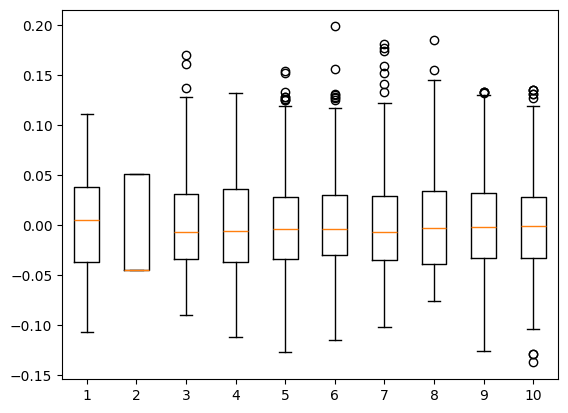

In [40]:
plt.boxplot(x)
plt.show()

In [7]:
y.shape

(442,)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= .2, random_state= 42)

In [12]:
lr = LinearRegression()
lr

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
model = lr.fit(x_train, y_train)

In [43]:
coef = model.coef_
coef

array([  37.90402135, -241.96436231,  542.42875852,  347.70384391,
       -931.48884588,  518.06227698,  163.41998299,  275.31790158,
        736.1988589 ,   48.67065743])

In [18]:
model.intercept_

np.float64(151.34560453985995)

In [ ]:
y_pred = model.predict(x_test)

In [21]:
y_pred[:10]

array([139.5475584 , 179.51720835, 134.03875572, 291.41702925,
       123.78965872,  92.1723465 , 258.23238899, 181.33732057,
        90.22411311, 108.63375858])

In [22]:
y_test[:10]

array([219.,  70., 202., 230., 111.,  84., 242., 272.,  94.,  96.])

In [24]:
r2_score(y_test, y_pred)

0.4526027629719197

In [69]:
# df = pd.DataFrame(y_test, y_pred).reset_index().rename(columns={"index" : "y_test", 0 : "y_pred"})
df = pd.DataFrame({
  "Y_test" : y_test,
  "Y_pred" : y_pred
  })
df

,Y_test,Y_pred
0,219.0,139.547558
1,70.0,179.517208
2,202.0,134.038756
3,230.0,291.417029
4,111.0,123.789659
...,...,...
84,153.0,115.011800
85,98.0,78.955842
86,37.0,81.560873
87,63.0,54.379973


In [74]:
ans = []
for row in x_test:
  a = 0
  for i in range(0, len(coef)):
    a += (row[i] * coef[i])
  a += model.intercept_
  ans.append(a)

ans[:5]

[np.float64(139.54755840379613),
 np.float64(179.51720835342772),
 np.float64(134.03875571890126),
 np.float64(291.4170292522082),
 np.float64(123.78965872239607)]

In [72]:
df['manual_pred'] = ans
df

,Y_test,Y_pred,manual_pred
0,219.0,139.547558,139.547558
1,70.0,179.517208,179.517208
2,202.0,134.038756,134.038756
3,230.0,291.417029,291.417029
4,111.0,123.789659,123.789659
...,...,...,...
84,153.0,115.011800,115.011800
85,98.0,78.955842,78.955842
86,37.0,81.560873,81.560873
87,63.0,54.379973,54.379973
